In [7]:
import pandas as pd
import matplotlib.pyplot as plt
import cartopy.crs as ccrs
import numpy as np

# OBSERVATION DATA
forcens = pd.read_csv("~/Science/lgm_foram_census/tidy/forcens_sp_r_wsst.csv")
lgm = pd.read_csv("~/Science/lgm_foram_census/tidy/lgm_sp_r_wsst.csv")
lgm = lgm[lgm["Data_Source"]=='margo']

topt = pd.read_csv("../data/Topt_sp_lgm.csv")
species_list = topt.species

In [25]:
topt

,species,LGM_Topt_mean,PI_Topt_mean,LGM_Topt_sd,PI_Topt_sd,LGM_Topt_min,PI_Topt_min,LGM_Topt_max,PI_Topt_max,Topt_mean_diff
0,B. digitata,23.017654,25.019378,1.096942,3.423691,20.754140,18.689772,26.359826,29.247292,2.001724
1,C. nitida,23.402603,27.609400,0.756879,0.734536,22.763167,26.406864,26.359826,29.290630,4.206797
2,G. bulloides,10.938016,14.324539,0.878700,4.284557,9.565032,6.119328,12.236580,19.677656,3.386523
3,G. calida,24.627243,28.745467,0.605794,0.276359,23.821697,28.294987,25.983650,29.290630,4.118224
4,G. conglobatus,26.056556,26.262695,0.179490,1.745040,25.919580,21.866669,26.359826,29.290630,0.206140
5,G. conglomerata,25.938337,28.530791,0.230110,0.333344,25.638893,28.143034,26.359826,29.290630,2.592455
6,G. crassaformis,22.431827,22.670984,1.265493,1.280128,19.164235,20.247692,24.596538,24.677603,0.239156
7,G. cultrata,25.931281,27.685381,0.253940,0.529138,25.683394,26.784880,26.190869,28.757994,1.754100
8,G. falconensis,14.826363,17.899858,2.352354,1.354683,12.502131,15.009075,20.567692,20.050014,3.073495
9,G. glutinata,25.027733,26.428539,0.521801,1.105485,24.371056,25.247017,26.359826,29.290630,1.400806


/Users/yingrui/miniforge3/envs/workspace/lib/python3.10/site-packages/shapely/constructive.py:181: RuntimeWarning: invalid value encountered in buffer
  return lib.buffer(
/Users/yingrui/miniforge3/envs/workspace/lib/python3.10/site-packages/shapely/constructive.py:181: RuntimeWarning: invalid value encountered in buffer
  return lib.buffer(
/Users/yingrui/miniforge3/envs/workspace/lib/python3.10/site-packages/shapely/constructive.py:181: RuntimeWarning: invalid value encountered in buffer
  return lib.buffer(
/Users/yingrui/miniforge3/envs/workspace/lib/python3.10/site-packages/shapely/constructive.py:181: RuntimeWarning: invalid value encountered in buffer
  return lib.buffer(
/Users/yingrui/miniforge3/envs/workspace/lib/python3.10/site-packages/shapely/constructive.py:181: RuntimeWarning: invalid value encountered in buffer
  return lib.buffer(
/Users/yingrui/miniforge3/envs/workspace/lib/python3.10/site-packages/shapely/constructive.py:181: RuntimeWarning: invalid value encountered

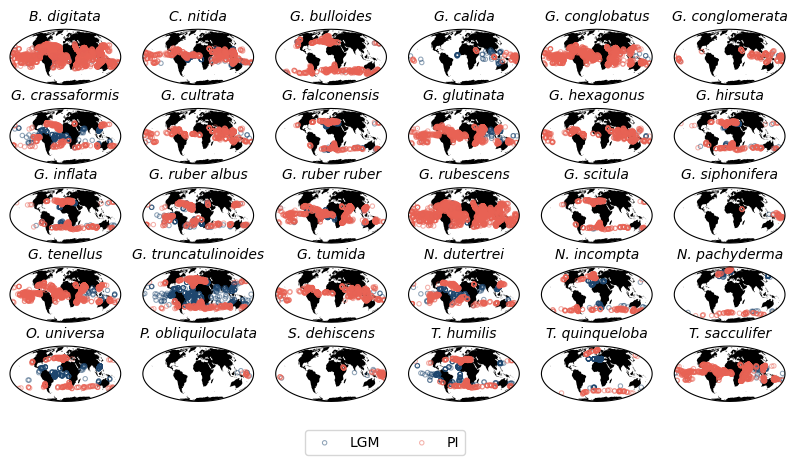

In [28]:
## write a function to filter species
def sp_opt_sub(df, species, age):
    ## select latitudes, longitudes and species columns
    df_sub = df[['Latitude','Longitude',species, "SST"]]
    
    ## get the optimal niche
    opt_niche = topt[topt.species==species]

    ## if LGM
    if age == "LGM":
        Topt_mean = opt_niche.iloc[0,1]
        Topt_sd = opt_niche.iloc[0,3]
    elif age == "PI":
        Topt_mean = opt_niche.iloc[0,2]
        Topt_sd = opt_niche.iloc[0,4]
    else:
        raise ValueError("age must be either lgm or pi")
    
    df_sub = df_sub[(df_sub.SST >= Topt_mean-Topt_sd) & (df_sub.SST <= Topt_mean+Topt_sd)]
        
    return df_sub

## write a function to plot optimal niche, just occurence
def plot_opt_niche(ax, df, species, age, **kwargs):
    ## select latitudes, longitudes and species columns
    df_sub = sp_opt_sub(df, species, age)
    ## plot
    ax.scatter(df_sub.Longitude, df_sub.Latitude,
               #s = df_sub[species],
               s=10,
               facecolors='none',
               transform=ccrs.PlateCarree(), **kwargs)
    return ax

## do this for multiple species
fig, axes = plt.subplots(nrows=6, ncols=6,
                         figsize=(10, 6),
                         subplot_kw=dict(projection=ccrs.Mollweide()))

from cartopy.feature import LAND
for i, ax in enumerate(axes.flat):
    ## add coastlines
    ax.set_global()
    ## add land mask
    ax.add_feature(LAND, facecolor="black")
    ax.set_title(species_list[i], style='italic', fontfamily='sans-serif', fontsize=10)

    plot_opt_niche(ax, lgm, species_list[i], age='LGM', label="LGM",
                   edgecolors="#1e466e", alpha=0.5,
                    linewidth=0.75)
    
    plot_opt_niche(ax, forcens, species_list[i], age='PI', label="PI",
                   edgecolors="#e86254",alpha=0.5,
                    linewidth=0.75)

    ## if exceed the number of species, break
    if i == len(species_list) - 1:
        break

## remove unused axes
for ax in axes.flat[i+1:]:
    ax.remove()

## legend
#fig.legend(["LGM", "PI"], loc="lower center", ncol=1, bbox_to_anchor=(0.58, 0.13))
fig.legend(["LGM", "PI"], loc="lower center", ncol=2, bbox_to_anchor=(0.5, 0.15))

## save the fig
fig.savefig("../output/opt_niche_change.png", dpi=300, bbox_inches='tight')